<a href="https://colab.research.google.com/github/GabrielCdev/INEP_dataset_analysis/blob/main/INEP_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio final

##Enem 2021
"Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem."


Base para a atividade: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

###....:::: Membros ::::....
Áureo Ramos

Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:

Realizar uma análise explorátoria e, com base nela, aplicar algoritmos de Machine Learning através da Classificação para inferir qual/quais atributos são mais significativos para que o aluno obtenha uma média de 800 pontos na nota de corte.

https://blogdoenem.com.br/notas-de-corte-do-sisu/

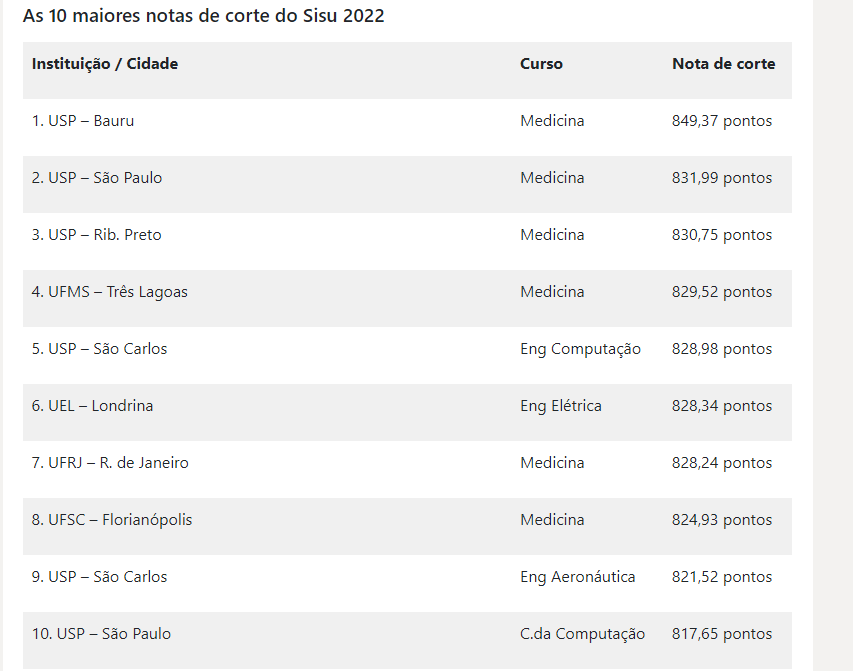

#Importação dos dados

In [1]:
# Bibliotecas principais
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from numpy.random import RandomState
import zipfile

In [3]:
!wget --no-check-certificate https://download.inep.gov.br/microdados/microdados_enem_2021.zip

--2023-03-12 23:40:45--  https://download.inep.gov.br/microdados/microdados_enem_2021.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 498188358 (475M) [application/zip]
Saving to: ‘microdados_enem_2021.zip.2’

microdados_enem_202 100%[===================>] 475.11M   368KB/s    in 26m 50s 

2023-03-13 00:07:37 (302 KB/s) - ‘microdados_enem_2021.zip.2’ saved [498188358/498188358]



#Extração dos dados

In [2]:
# open zipped dataset
with zipfile.ZipFile("microdados_enem_2021.zip") as z:
  # open the csv file in the dataset
  with z.open("DADOS/MICRODADOS_ENEM_2021.csv") as f:
      # read the dataset
      enem_df = pd.read_csv(f, sep=';', encoding='latin-1')

#Visualização dos dados

In [3]:
enem_df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2.30e+06,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2.31e+06,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goiânia,52,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,5.0,C,C,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,

In [4]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

#Identificação das variáveis

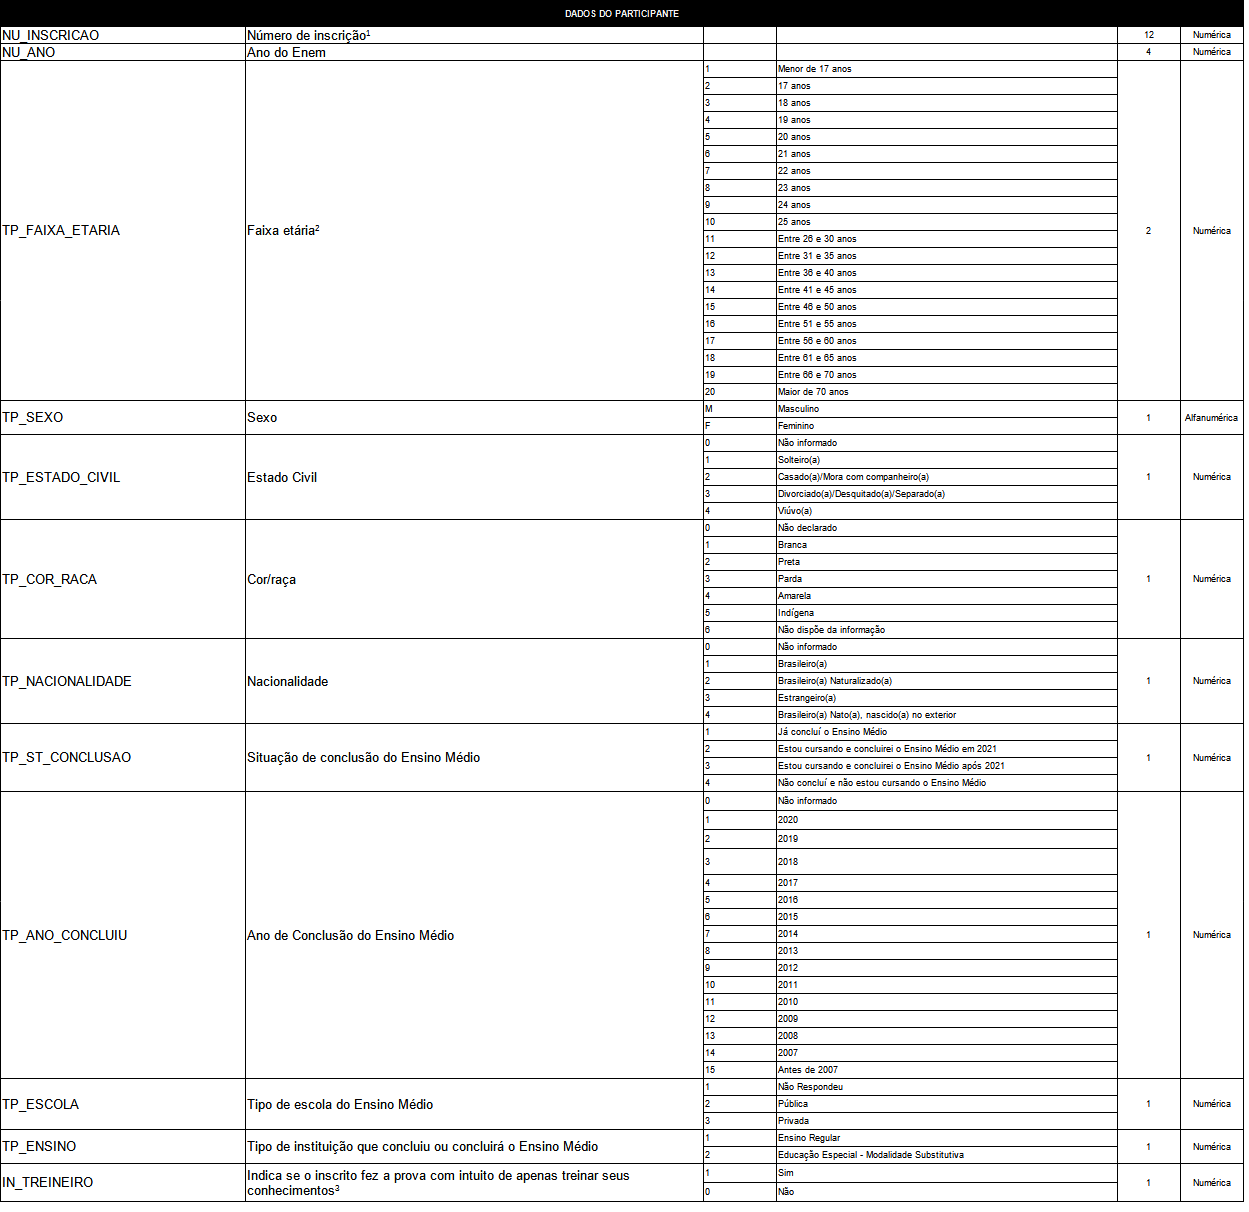

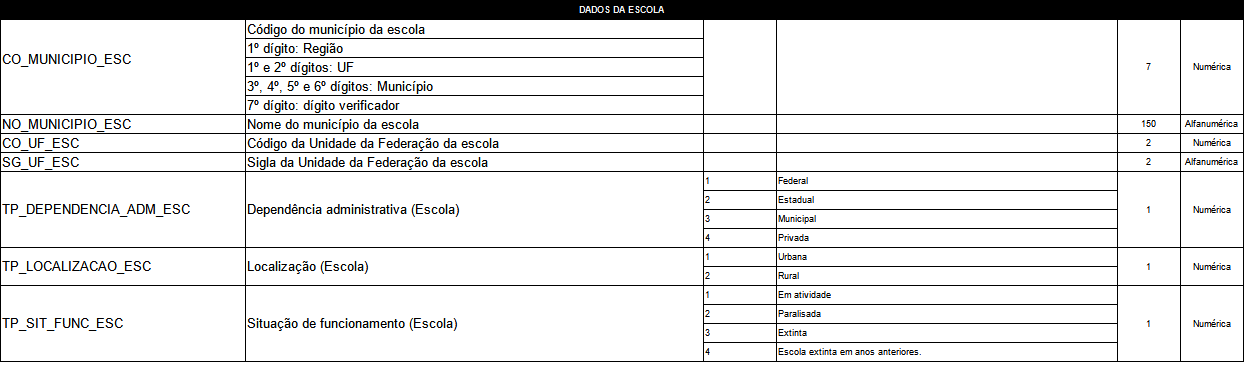

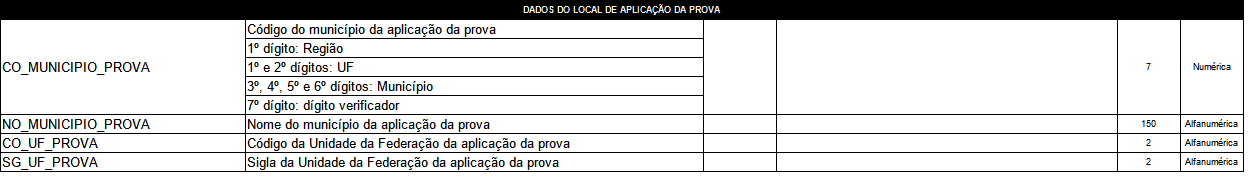

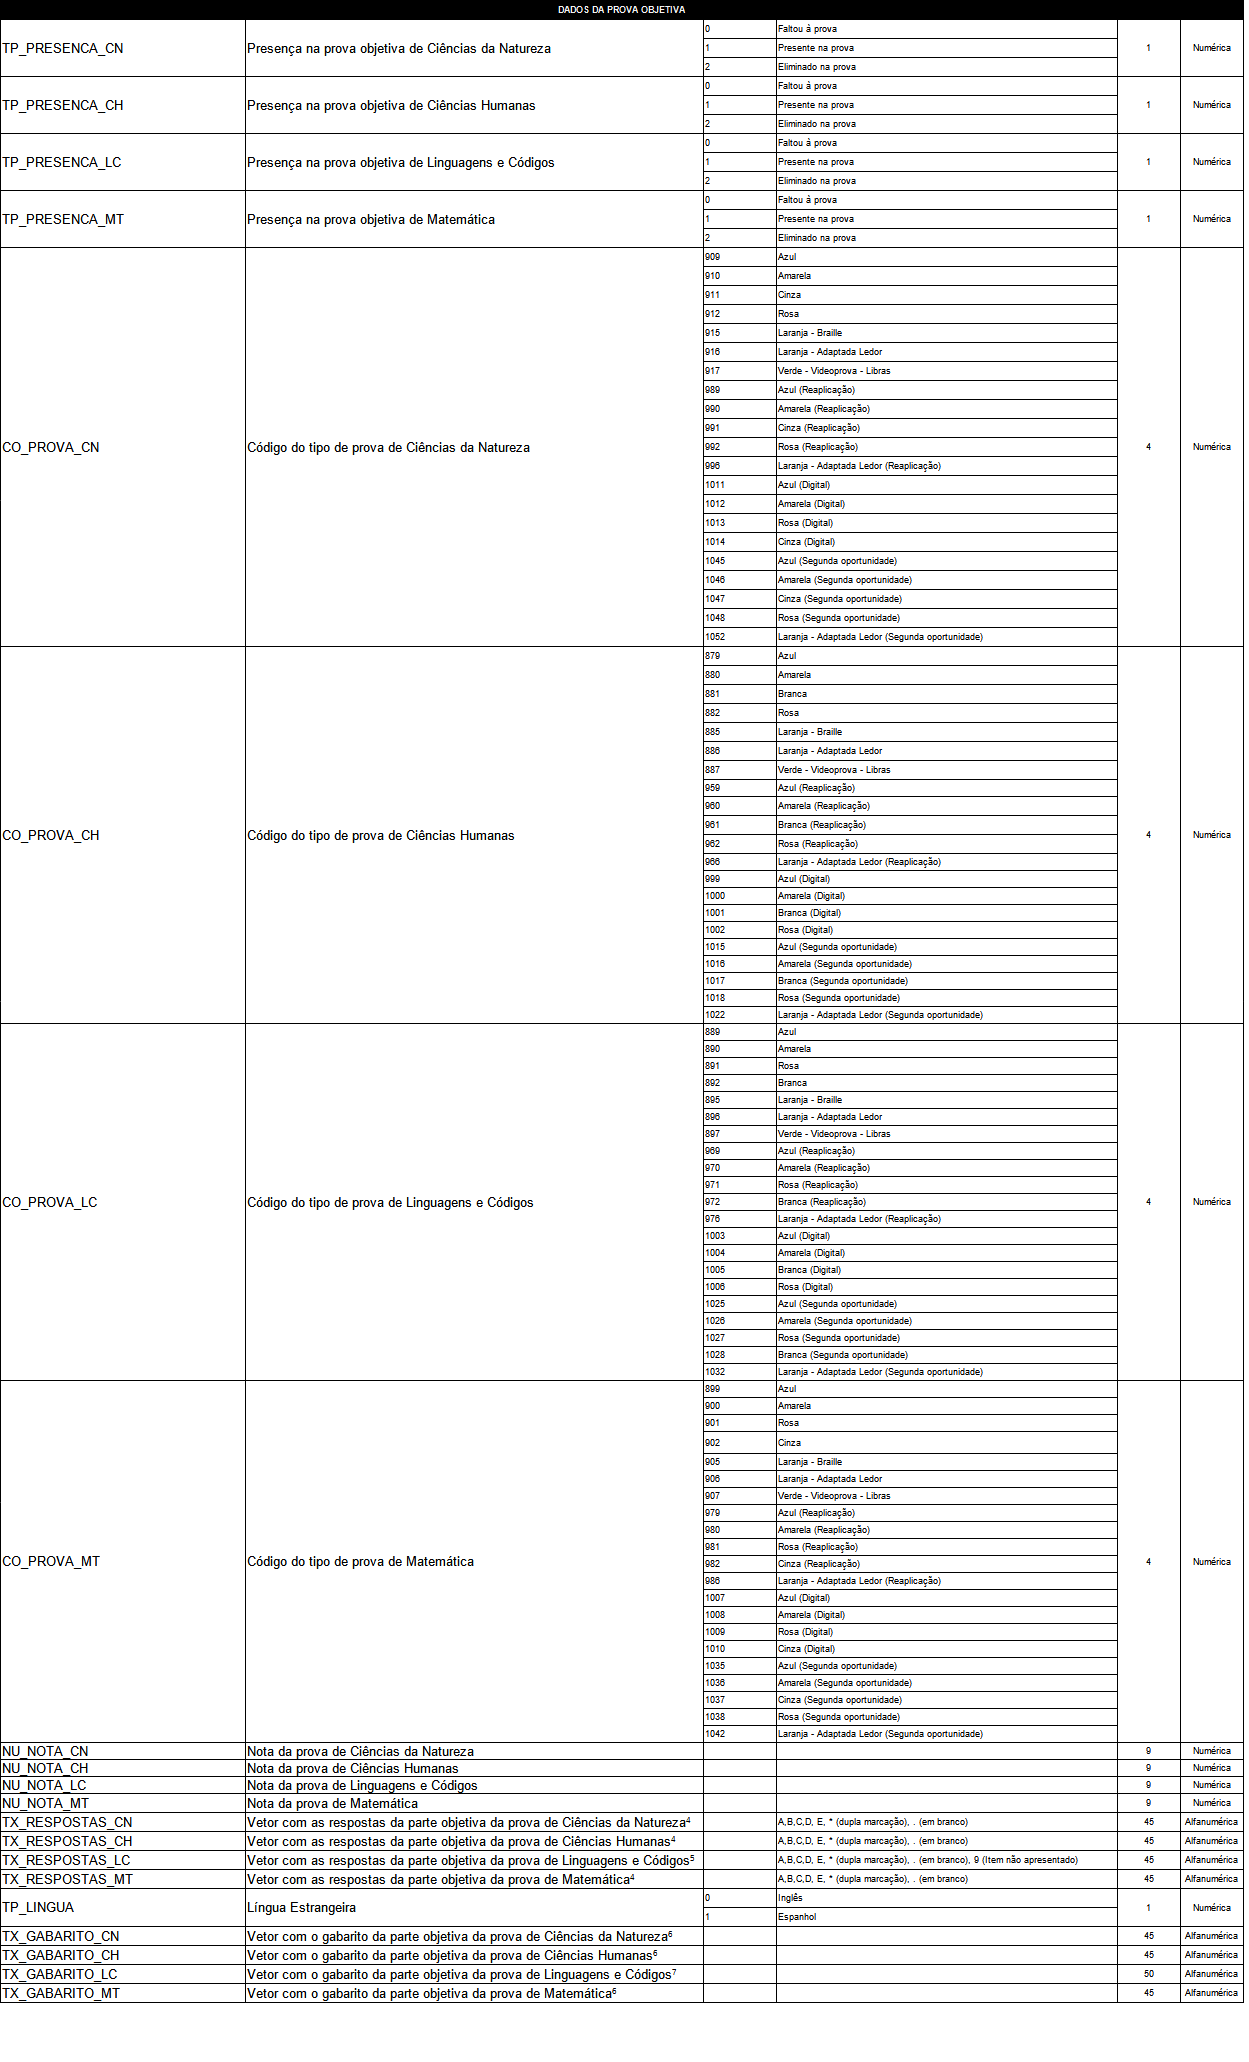

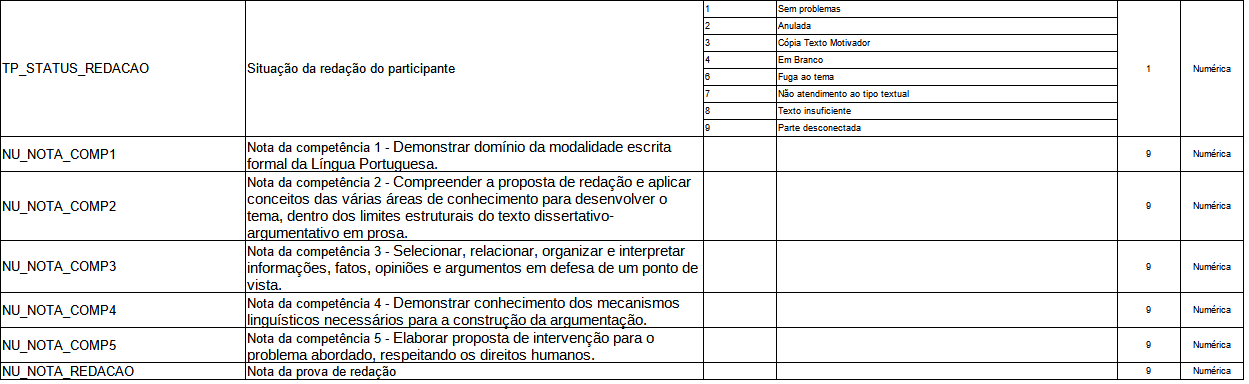

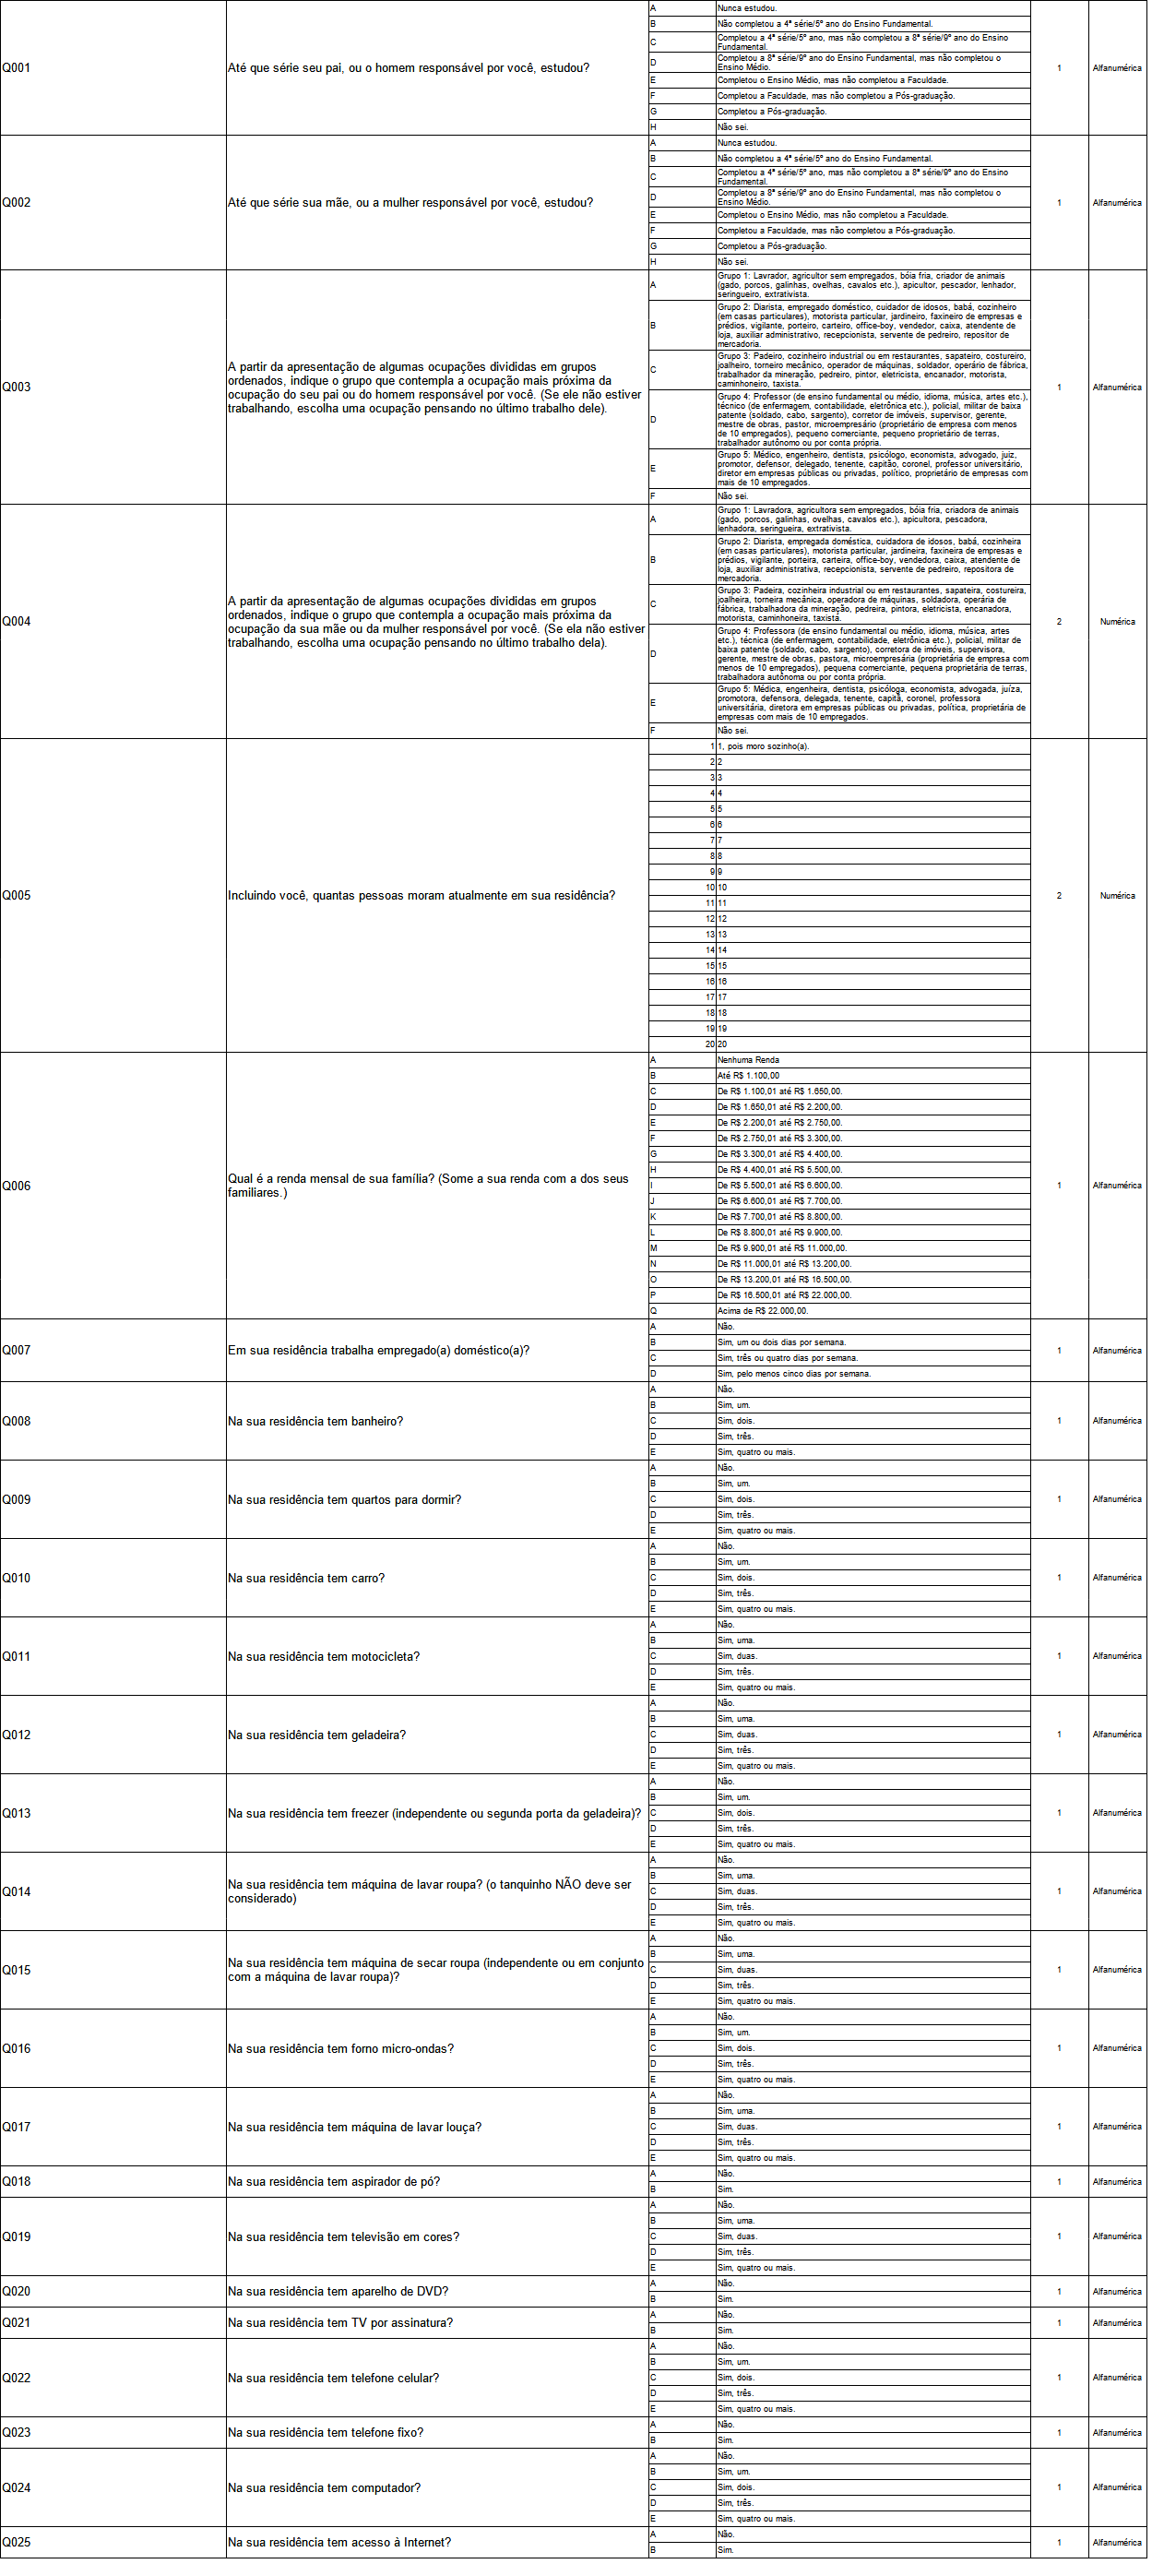

# Pré-processamento de dados

##Verificação de dados duplicados

In [5]:
# Remoção de dados/chaves que possam enviesar a verificação de duplicados
enem_df.drop(columns=['NU_INSCRICAO', 'NU_ANO'], inplace=True)

In [6]:
enem_df[enem_df.duplicated()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
28709,4,F,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100452,Buritis,11,RO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,5.0,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,C,A,B,B
40233,5,F,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800308,Aracaju,28,SE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,B,B,3.0,B,A,B,D,A,B,B,B,B,B,B,A,A,C,A,A,E,A,B,B
47510,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,4.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
55388,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,4.0,B,A,B,B,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,A
57309,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,5.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383294,11,F,1,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3143302,Montes Claros,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2.0,C,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,C,B
3384597,9,F,1,1,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3302205,Itaperuna,33,RJ,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,4.0,G,A,D,D,B,B,B,A,B,A,B,A,B,C,A,A,E,A,C,B
3386628,11,F,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3503208,Araraquara,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,C,4.0,G,A,B,C,B,C,B,A,A,A,B,A,A,B,A,A,E,A,C,B
3387868,11,F,1,1,1,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3503208,Araraquara,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,F,B,3.0,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [7]:
enem_df = enem_df.drop_duplicates()

In [8]:
enem_df.duplicated().values.any()

False

## Remoção de colunas que não serão utilizadas na análise


In [9]:
# Removidas as colunas que não serão utilizadas na análise
enem_df.drop(columns=['TP_ESTADO_CIVIL', 'IN_TREINEIRO', 
                      'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 
                      'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 
                      'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
                      'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
                      'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT','TP_ST_CONCLUSAO',
                      'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
                      'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
                      'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                      'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                      'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
                      'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
                      'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
                      'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_SIT_FUNC_ESC',
                      'Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q007', 'Q008', 'Q009',
                      'Q010', 'Q011' ,'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
                      'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##Analisando os candidatos PRESENTES na prova

In [10]:
# Removendo os alunos que faltaram ou foram eliminados na prova
enem_df = enem_df.loc[(enem_df['TP_PRESENCA_CN'] == 1) & (enem_df['TP_PRESENCA_CH'] == 1) & 
                      (enem_df['TP_PRESENCA_LC'] == 1) & (enem_df['TP_PRESENCA_MT'] == 1)]

In [11]:
# Agora que restaram apenas linhas com candidatos PRESENTES, removemos as colunas
enem_df.drop(columns=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'], inplace=True)

##Criação de colunas para o dataframe

###Coluna para média de notas

In [15]:
# Criação da coluna para média das notas
enem_df['MEDIA_NOTAS'] = enem_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].apply(lambda row: row.sum()/5, axis=1)

In [17]:
# Criação da coluna APROVADO se média >= 800
soma_notas = enem_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

enem_df['APROVADO'] = soma_notas.sum(axis=1) / 5
enem_df['APROVADO'] = enem_df.APROVADO.apply(lambda x: 0 if x < 800 else 1)

In [18]:
# Removendo as colunas após o cálculo das médias
enem_df.drop(columns=['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO'], inplace=True)

###Coluna para agrupar estados por regiões

In [20]:
uf_regioes = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste', 
              'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 
              'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste', 
              'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 
              'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 
              'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# mapeamento da coluna SG_UF_ESC para a nova coluna REGIAO_ESCOLA
enem_df['REGIAO_ESCOLA'] = enem_df['SG_UF_ESC'].map(uf_regioes)

In [21]:
# Removendo a coluna após o agrupamento
enem_df.drop(columns='SG_UF_ESC', inplace=True)

##Renomenado colunas do dataframe

In [22]:
enem_df.rename(columns = {'Q006':'RENDA', 'Q024':'COMPUTADOR', 'Q025':'INTERNET'}, inplace = True)

##Verificação de dados nulos

In [23]:
enem_df.isna().sum()

TP_FAIXA_ETARIA          0
TP_SEXO                  0
TP_COR_RACA              0
TP_ESCOLA                0
RENDA                    1
COMPUTADOR               1
INTERNET                 1
MEDIA_NOTAS              0
APROVADO                 0
REGIAO_ESCOLA      1635656
dtype: int64

In [24]:
enem_df.loc[enem_df['RENDA'].isnull()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,RENDA,COMPUTADOR,INTERNET,MEDIA_NOTAS,APROVADO,REGIAO_ESCOLA
707314,8,F,4,1,NaN,NaN,NaN,467.28,0,NaN


In [28]:
enem_df.drop(index=707314, inplace=True)

## Resetando index do dataframe

In [29]:
enem_df.reset_index(inplace=True, drop=True)

#Análise exploratória dos atributos

In [30]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238105 entries, 0 to 2238104
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_COR_RACA      int64  
 3   TP_ESCOLA        int64  
 4   RENDA            object 
 5   COMPUTADOR       object 
 6   INTERNET         object 
 7   MEDIA_NOTAS      float64
 8   APROVADO         int64  
 9   REGIAO_ESCOLA    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 170.8+ MB


##Transformação de Atributos para Análise Exploratória

###Atributo: Internet

In [31]:
enem_df['INTERNET'].unique()

array(['A', 'B'], dtype=object)

In [32]:
enem_df['INTERNET'] = enem_df['INTERNET'].map({'A': False, 'B': True})

###Atributo: Aprovado

In [33]:
enem_df['APROVADO'].unique()

array([0, 1])

In [34]:
enem_df['APROVADO'] = enem_df['APROVADO'].astype('bool')

###Atributo: Região escola

In [35]:
enem_df.loc[enem_df['REGIAO_ESCOLA'].isna(), 'REGIAO_ESCOLA'] = 'NI' #Não informado

##Sumarização dos dados categóricos

In [39]:
enem_df.describe(include='O')

,TP_SEXO,RENDA,COMPUTADOR,REGIAO_ESCOLA
count,2238105,2238105,2238105,2238105
unique,2,17,5,6
top,F,B,B,NI
freq,1381947,546733,954010,1635655


A partir desta análise inferimos que:
*   Há a maior presença de candidatos do sexo feminino;
*   A maior parte dos candidatos possuem renda de até R$ 1.100,00;
*   A maioria dos candidatos possuem apenas 1 computador.
*   A maior parte dos candidatos não informaram a região da escola.



##Análise Univariada

###Atributo: Faixa etária

In [40]:
enem_df['TP_FAIXA_ETARIA'].unique()

array([12,  3,  2,  8,  4,  5, 11,  7, 13,  1, 10,  9,  6, 14, 16, 15, 17,
       18, 19, 20])

In [33]:
enem_df['TP_FAIXA_ETARIA'].value_counts(sort=True)

3     524438
2     516508
4     259966
1     232839
5     151394
6      99476
11     98780
7      69875
12     55879
8      50703
9      40979
13     40716
10     32499
14     27010
15     17519
16     10581
17      5674
18      2216
19       744
20       310
Name: TP_FAIXA_ETARIA, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


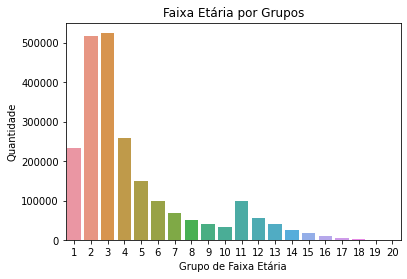

In [34]:
ax = sns.countplot(enem_df['TP_FAIXA_ETARIA'])

# Adicionando título e rótulos aos eixos
ax.set_title('Faixa Etária por Grupos')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo de Faixa Etária')

plt.show()

- Os grupos de idades que mais realizaram a prova do ENEM no ano de 2021 foram os grupos de 18 e 17 anos com mais de 500.000 candidatos (respectivamente, 524.438 e 516.508 candidatos), seguido pelos grupos de 19, até 17 e 20 anos, com números de candidatos menores que 260 mil.

- Os grupos de idade entre 56 e 70 anos (grupos 17 a 20), tiveram a menor expressão de dados, somando 8.944 candidatos ao todo.

###Atributo: Sexo

In [35]:
enem_df['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [36]:
enem_df['TP_SEXO'].value_counts(sort=True)

F    1381948
M     856158
Name: TP_SEXO, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


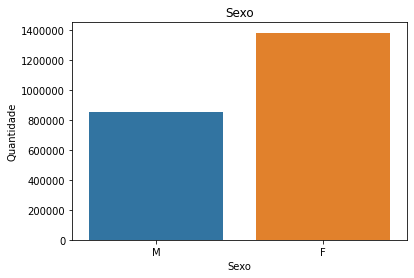

In [37]:
ax = sns.countplot(enem_df['TP_SEXO'])

# Adicionando título e rótulos aos eixos
ax.set_title('Sexo')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Sexo')

plt.show()

O maior número de candidatos inscritos e presentes durante a prova foi do sexo **feminino**, totalizando quase 1.400.000 candidatos.

###Atirbuto: Cor/Raça

In [38]:
enem_df['TP_COR_RACA'].unique()

array([1, 3, 2, 4, 5, 0, 6])

In [39]:
enem_df['TP_COR_RACA'].value_counts(sort=True)

1    979456
3    912861
2    246568
4     44946
0     43733
5     10540
6         2
Name: TP_COR_RACA, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


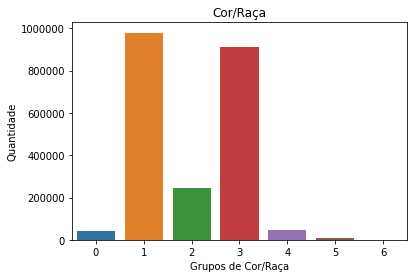

In [40]:
ax = sns.countplot(enem_df['TP_COR_RACA'])

# Adicionando título e rótulos aos eixos
ax.set_title('Cor/Raça')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupos de Cor/Raça')

plt.show()

- As raças mais expressivas dentre os candidatos presentes nas provas foram: branca e parda com quase 1.000.000 de candidatos (979.456 e 912.861 candidatos, respectivamente). Seguidos da raça preta com 246.568 candidatos.

###Atributo: Escola

In [41]:
enem_df['TP_ESCOLA'].unique()

array([1, 2, 3])

In [42]:
enem_df['TP_ESCOLA'].value_counts(sort=True)

1    1390709
2     668036
3     179361
Name: TP_ESCOLA, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


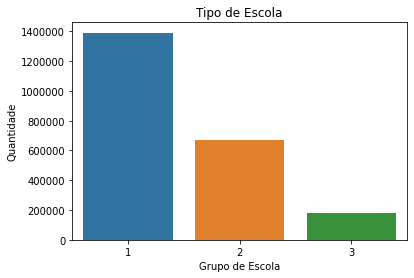

In [43]:
ax = sns.countplot(enem_df['TP_ESCOLA'])

# Adicionando título e rótulos aos eixos
ax.set_title('Tipo de Escola')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo de Escola')

plt.show()

- A maior parte dos candidatos que declararam o tipo de escola do ensino médio foram de escolas públicas, sendo selecionada mais de 600.000 vezes (668.036 candidatos), enquanto que os candidatos de escolas privadas somaram 179.361 candidatos.
- No geral, quase 1.400.000 candidatos não declararam qual o tipo de escolas que eles pertenciam (1.390.709 candidatos).

###Atributo: Renda

In [44]:
enem_df['RENDA'].unique()

array(['B', 'C', 'D', 'G', 'H', 'F', 'E', 'A', 'I', 'J', 'O', 'K', 'M',
       'Q', 'N', 'L', 'P'], dtype=object)

In [45]:
enem_df['RENDA'].value_counts(sort=True)

B    546733
C    346838
D    277708
F    168049
G    147647
E    143957
H    118749
A    112899
I     75420
M     47849
J     46934
Q     39914
K     37157
O     32862
P     32802
L     32560
N     30028
Name: RENDA, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


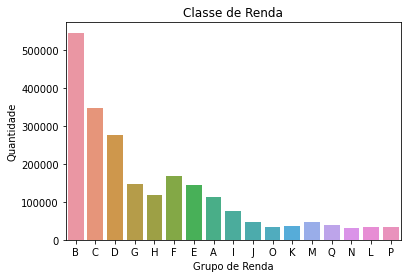

In [46]:
ax = sns.countplot(enem_df['RENDA'])

# Adicionando título e rótulos aos eixos
ax.set_title('Classe de Renda')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo de Renda')

plt.show()

- A maior parte dos candidatos que fizeram a prova do ENEM possuíam rendas de até 1.100 reais ou até 2.200 reais (grupos B: 546.733 candidatos, C: 346.838 candidatos e D: 277.708 candidatos).

###Atributo: Computador

In [47]:
enem_df['COMPUTADOR'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [48]:
enem_df['COMPUTADOR'].value_counts(sort=True)

B    954011
A    833126
C    279242
D    113143
E     58584
Name: COMPUTADOR, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


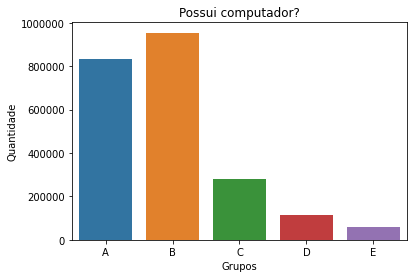

In [49]:
ax = sns.countplot(enem_df['COMPUTADOR'])

# Adicionando título e rótulos aos eixos
ax.set_title('Possui computador?')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupos')

plt.show()

- Cerca de 1.000.000 dos candidatos que fizeram o ENEM possuíam pelo menos um computador em casa (Grupo B: 954.011 candidatos).
- Pouco mais de 800.000 candidatos (833.126) não possuíam computador em casa.
- O total de candidatos que possuíam computadores em casa foi de: 1.404.980 candidatos, quase 60% dos dados da análise.

###Atributo: Internet

In [50]:
enem_df['INTERNET'].unique()

array([False,  True])

In [51]:
enem_df['INTERNET'].value_counts(sort=True)

True     2048739
False     189367
Name: INTERNET, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


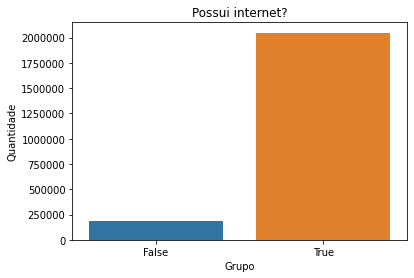

In [52]:
ax = sns.countplot(enem_df['INTERNET'])

# Adicionando título e rótulos aos eixos
ax.set_title('Possui internet?')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo')

plt.show()

- Cerca de 91% dos candidatos que fizeram a prova (2.048.739 candidatos) possuíam internet em suas residências.

###Atributo: Média de notas

In [43]:
enem_df['MEDIA_NOTAS'].unique()

array([515.5 , 667.6 , 570.06, ..., 533.78, 553.6 , 602.3 ])

In [44]:
enem_df['MEDIA_NOTAS'].value_counts(sort=True)

497.00    247
512.20    243
516.78    242
508.70    236
530.20    236
         ... 
170.92      1
812.40      1
669.92      1
726.58      1
602.30      1
Name: MEDIA_NOTAS, Length: 50377, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


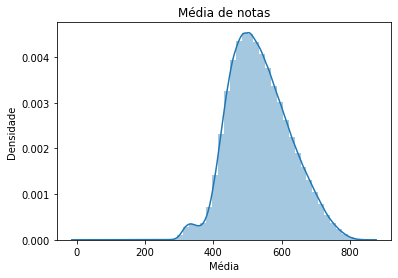

In [47]:
ax = sns.distplot(enem_df['MEDIA_NOTAS'])

# Adicionando título e rótulos aos eixos
ax.set_title('Média de notas')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Densidade')
ax.set_xlabel('Média')

plt.show()

- A maior parte dos candidatos tiveram notas médias entre 400 e 800 pontos, sendo o pico de médias em cerca de 500 pontos.

###Atributo: Aprovado

In [48]:
enem_df['APROVADO'].unique()

array([False,  True])

In [49]:
enem_df['APROVADO'].value_counts(sort=True)

False    2236296
True        1809
Name: APROVADO, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


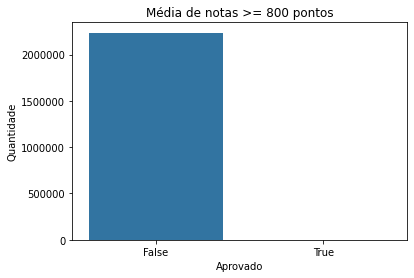

In [50]:
ax = sns.countplot(enem_df['APROVADO'])

# Adicionando título e rótulos aos eixos
ax.set_title('Média de notas >= 800 pontos')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Aprovado')

plt.show()

- Conforme análise, mais de 2.000.000 de candidatos que fizeram o ENEM não obtiveram a média de nota > 800 pontos (2.236.297 candidatos).
- Apenas 1809 lograram êxito neste quesito, por isso consideraram-se como aprovados.

###Atributo: Região escola

In [56]:
enem_df['REGIAO_ESCOLA'].unique()

array(['NI', 'Nordeste', 'Sudeste', 'Norte', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [57]:
enem_df['REGIAO_ESCOLA'].value_counts(sort=True)

NI              1635655
Sudeste          221783
Nordeste         191057
Sul               80978
Centro-Oeste      56614
Norte             52019
Name: REGIAO_ESCOLA, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


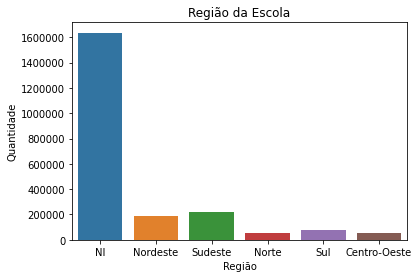

In [58]:
ax = sns.countplot(enem_df['REGIAO_ESCOLA'])

# Adicionando título e rótulos aos eixos
ax.set_title('Região da Escola')
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Região')

plt.show()

- Aproximadamente 1.600.000 candidatos (1.635.655 candidatos) não informaram a região da sua escola.
- Os maiores volumes de candidatos que fizeram a prova do ENEM estão nas regiões Sudeste e Nordeste (221.783 e 191.057 candidatos, respectivamente).
- As regiões Sul, Centro-Oeste e Norte somam 189.611 candidatos que fizeram a prova.

##Análise Multivariada

###Separação dos candidatos que tiveram média > 800 pontos

In [51]:
aprovado = enem_df.loc[enem_df['APROVADO'] == True]

In [52]:
aprovado

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,RENDA,COMPUTADOR,INTERNET,MEDIA_NOTAS,APROVADO,REGIAO_ESCOLA
964,7,M,4,1,Q,E,True,820.90,True,NI
3030,4,M,1,1,F,D,True,800.72,True,NI
3556,11,M,1,1,G,B,True,806.02,True,NI
4693,12,M,0,1,F,C,True,812.38,True,NI
8382,3,F,1,1,J,D,True,819.76,True,NI
...,...,...,...,...,...,...,...,...,...,...
2089905,13,M,3,1,N,C,True,819.62,True,NI
2092609,6,F,4,1,B,B,True,814.56,True,NI
2094455,4,M,1,1,M,C,True,818.36,True,NI
2118944,4,M,1,1,H,B,True,810.00,True,NI


###Atributo: Faixa Etária

In [61]:
group_byAgeGroup = enem_df.groupby('APROVADO')['TP_FAIXA_ETARIA'].value_counts(sort=True)
group_byAgeGroup

APROVADO  TP_FAIXA_ETARIA
False     3                  524003
          2                  516213
          4                  259619
          1                  232821
          5                  151159
          6                   99297
          11                  98706
          7                   69796
          12                  55862
          8                   50649
          9                   40941
          13                  40710
          10                  32470
          14                  27007
          15                  17519
          16                  10581
          17                   5674
          18                   2216
          19                    744
          20                    310
True      3                     435
          4                     347
          2                     295
          5                     235
          6                     179
          7                      79
          11                     74
  

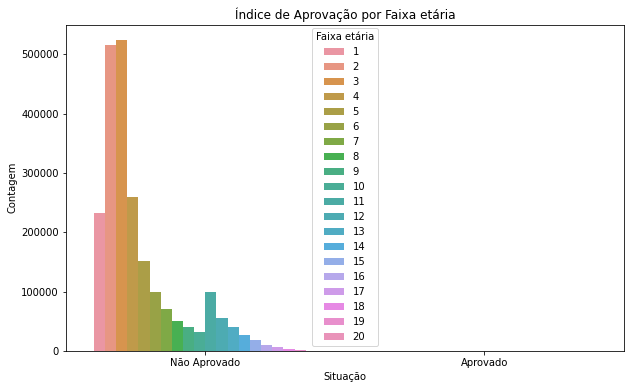

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_FAIXA_ETARIA', ax=ax)

plt.title('Índice de Aprovação por Faixa etária')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Observou-se que o maior número de reprovados está na faixa etária de 18 anos, seguidos pela faixa etária de 17 anos e em seguida a faixa etária de 19 anos.

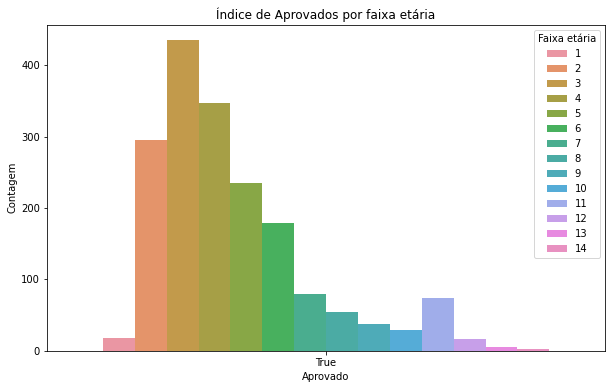

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_FAIXA_ETARIA', ax=ax)

plt.title('Índice de Aprovados por faixa etária')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária')

plt.show()

Observou-se que o maior número de aprovados está na faixa etária de 18 anos, seguidos pela faixa etária de 19 anos e em seguida a faixa etária de 17 anos.

###Atributo: Sexo

In [64]:
group_bySex = enem_df.groupby('APROVADO')['TP_SEXO'].value_counts()
group_bySex

APROVADO  TP_SEXO
False     F          1381189
          M           855108
True      M             1050
          F              759
Name: TP_SEXO, dtype: int64

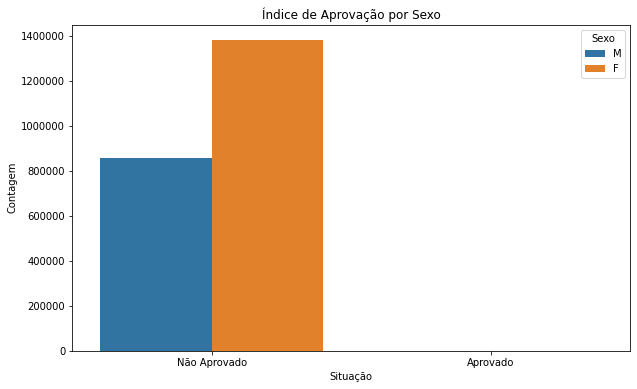

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_SEXO', ax=ax)

plt.title('Índice de Aprovação por Sexo')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Notou-se que, no ano de 2021, tiveram mais mulheres reprovadas do que homens.

Como a discrepância entre o volume de APROVADOS e NÃO APROVADOS é muito grande, foi necessário gerar um gráfico somente com APROVADOS.

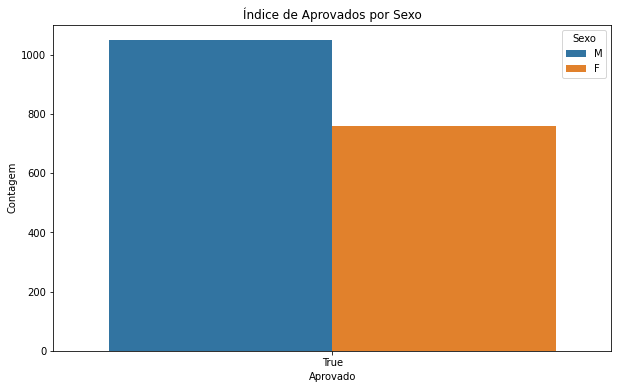

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_SEXO', ax=ax)

plt.title('Índice de Aprovados por Sexo')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Sexo')

plt.show()

Notou-se que, no ano de 2021, tiveram mais homens aprovados do que mulheres.

###Atributo: Cor/Raça

In [67]:
group_byRace = enem_df.groupby('APROVADO')['TP_COR_RACA'].value_counts()
group_byRace

APROVADO  TP_COR_RACA
False     1              978051
          3              912590
          2              246533
          4               44887
          0               43694
          5               10540
          6                   2
True      1                1405
          3                 271
          4                  59
          0                  39
          2                  35
Name: TP_COR_RACA, dtype: int64

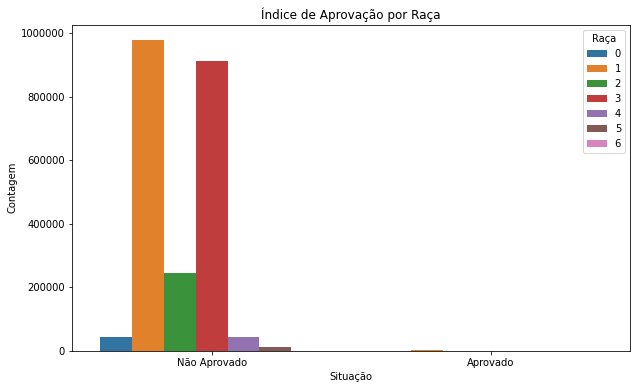

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_COR_RACA', ax=ax)

plt.title('Índice de Aprovação por Raça')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Raça', loc='upper right')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maior parte dos reprovados pertence ao grupos dos brancos, seguido pelo grupo dos pardos pretos.

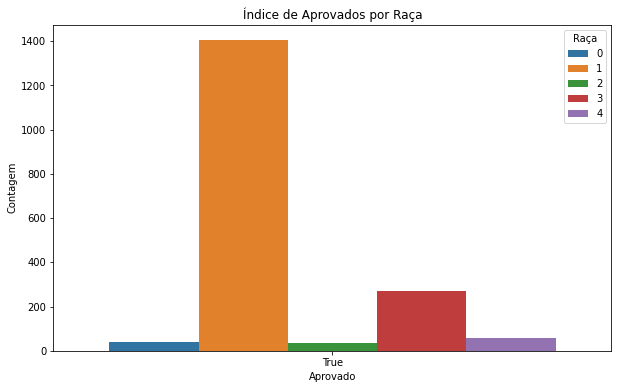

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_COR_RACA', ax=ax)

plt.title('Índice de Aprovados por Raça')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Raça')

plt.show()

Observou-se que a grande maioria dos aprovados pertence ao grupo de brancos, seguido pelo grupo de pardo e depois grupo de cor amarela.

###Atributo: Escola

In [70]:
group_bySchool = enem_df.groupby('APROVADO')['TP_ESCOLA'].value_counts()
group_bySchool

APROVADO  TP_ESCOLA
False     1            1389361
          2             667952
          3             178984
True      1               1348
          3                377
          2                 84
Name: TP_ESCOLA, dtype: int64

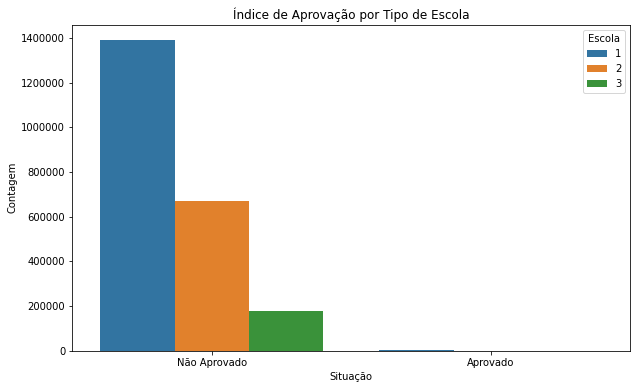

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_ESCOLA', ax=ax)

plt.title('Índice de Aprovação por Tipo de Escola')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Escola')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

O tipo de escola não nos permite encontrar um padrão, pois a maioria dos incritos não aprovados não informou o seu tipo de escola. Contudo, comparando os dados conhecidos, temos que a maioria dos rerovados estudou em escola pública.

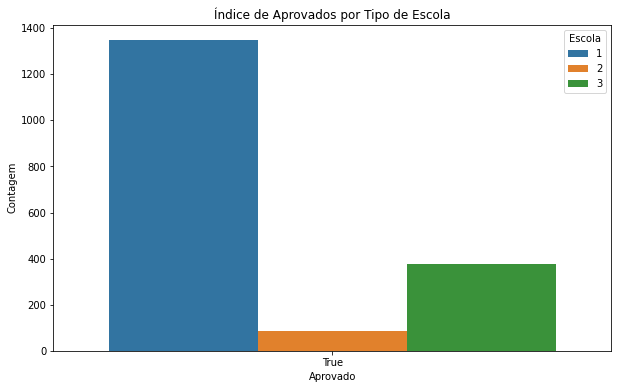

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_ESCOLA', ax=ax)

plt.title('Índice de Aprovados por Tipo de Escola')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Escola')

plt.show()

Novamente, o tipo de escola não nos permite encontrar um padrão, pois a maioria dos incritos não aprovados não informou o seu tipo de escola. Contudo, comparando os dados conhecidos, temos que a maioria dos aprovados estudou em escola privada.

###Atributo: Renda

In [73]:
group_byIncome = enem_df.groupby('APROVADO')['RENDA'].value_counts()
group_byIncome

APROVADO  RENDA
False     B        546715
          C        346808
          D        277658
          F        167979
          G        147549
          E        143914
          H        118606
          A        112897
          I         75303
          M         47689
          J         46858
          Q         39582
          K         37061
          O         32698
          P         32599
          L         32474
          N         29907
True      Q           332
          P           203
          O           164
          M           160
          H           143
          N           121
          I           117
          G            98
          K            96
          L            86
          J            76
          F            70
          D            50
          E            43
          C            30
          B            18
          A             2
Name: RENDA, dtype: int64

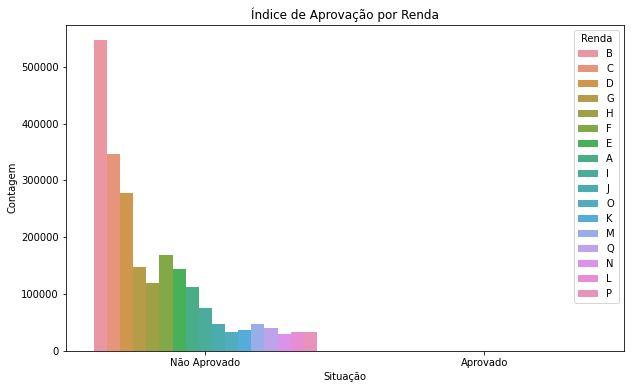

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='RENDA', ax=ax)

plt.title('Índice de Aprovação por Renda')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Renda')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Observou-se que a maior parte dos reprovados pertence aos grupos com menor renda familiar. 

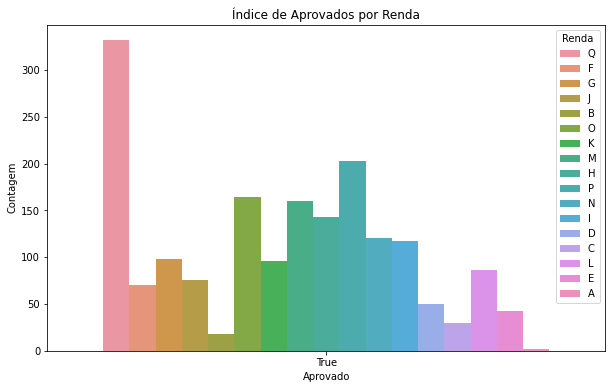

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='RENDA', ax=ax)

plt.title('Índice de Aprovados por Renda')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Renda')

plt.show()

Foi obervado que a maior concentração dos aprovados está nas maiores faixas de renda familiar.

###Atributo: Computador

In [76]:
group_byComputer = enem_df.groupby('APROVADO')['COMPUTADOR'].value_counts()
group_byComputer

APROVADO  COMPUTADOR
False     B             953623
          A             833096
          C             278652
          D             112702
          E              58224
True      C                590
          D                441
          B                388
          E                360
          A                 30
Name: COMPUTADOR, dtype: int64

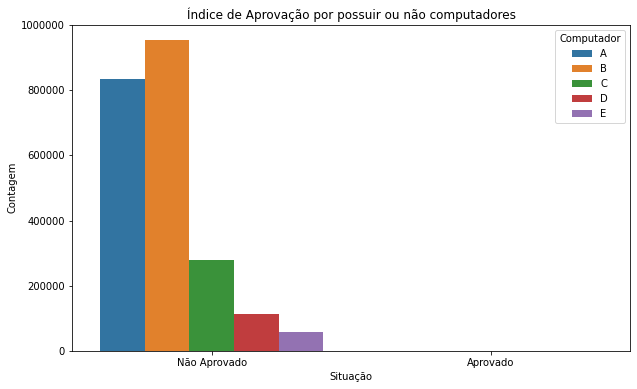

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='COMPUTADOR', ax=ax)

plt.title('Índice de Aprovação por possuir ou não computadores')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Computador')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maioria dos reprovados possui um ou nenhum computador em casa.

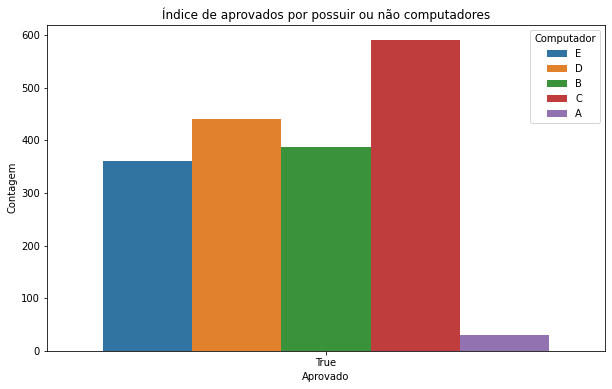

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='COMPUTADOR', ax=ax)

plt.title('Índice de aprovados por possuir ou não computadores')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Computador')

plt.show()

A maioria dos aprovados possui 2 computadores em casa, enquanto que a monoria dos aprovados possui um computador.

###Atributo: Internet

In [79]:
group_byInternet = enem_df.groupby('APROVADO')['INTERNET'].value_counts()
group_byInternet

APROVADO  INTERNET
False     True        2046932
          False        189365
True      True           1807
          False             2
Name: INTERNET, dtype: int64

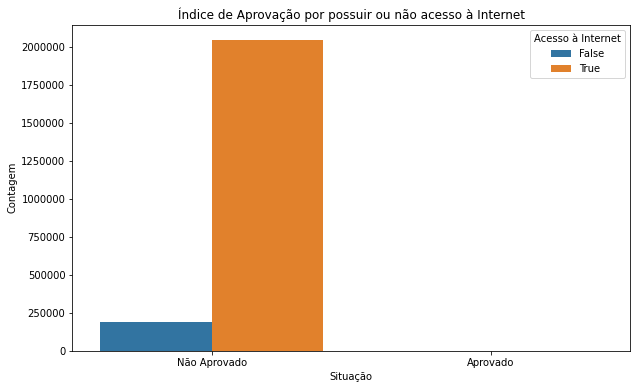

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='INTERNET', ax=ax)

plt.title('Índice de Aprovação por possuir ou não acesso à Internet')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Acesso à Internet')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maioria dos reprovados possui internet em casa.

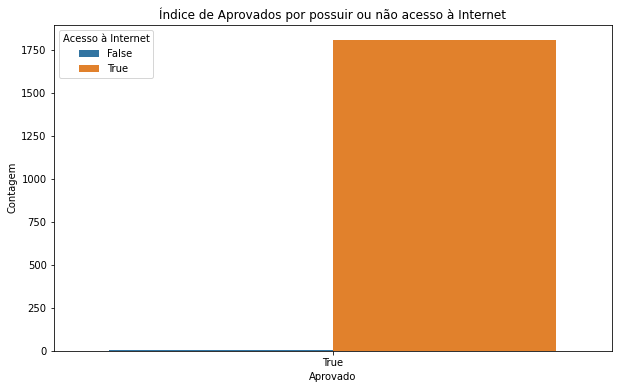

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='INTERNET', ax=ax)

plt.title('Índice de Aprovados por possuir ou não acesso à Internet')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Acesso à Internet')

plt.show()

A grande maioria dos aprovados possui internet em casa.

###Atributo: Região escola

In [55]:
group_bySchoolRegion = enem_df.groupby('APROVADO')['REGIAO_ESCOLA'].value_counts()
group_bySchoolRegion

APROVADO  REGIAO_ESCOLA
False     NI               1634300
          Sudeste           221558
          Nordeste          190938
          Sul                80922
          Centro-Oeste       56569
          Norte              52009
True      NI                  1355
          Sudeste              225
          Nordeste             119
          Sul                   55
          Centro-Oeste          45
          Norte                 10
Name: REGIAO_ESCOLA, dtype: int64

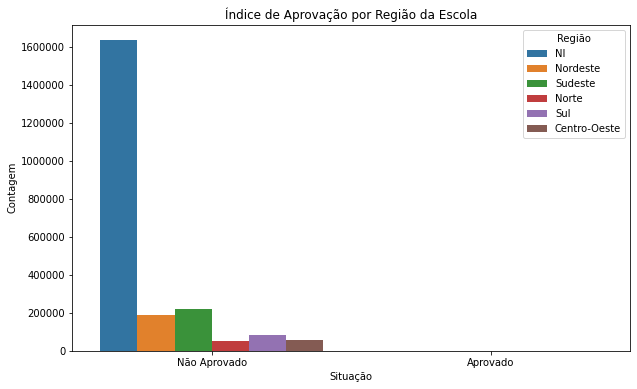

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='REGIAO_ESCOLA', ax=ax)

plt.title('Índice de Aprovação por Região da Escola')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Região')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

- Mais de 1.600.000 dos candidatos reprovados não informaram a região da sua escola (1.634.300 candidatos).
- As regiões com maior volume de reprovados foram a: Sudeste e Nordeste (221558 e 190938 candidatos, respectivamente).

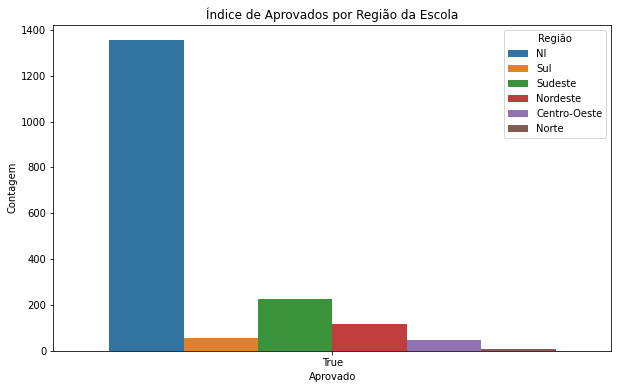

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='REGIAO_ESCOLA', ax=ax)

plt.title('Índice de Aprovados por Região da Escola')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Região')

plt.show()

- Do volume de aprovados, 1355 candidatos não informaram a região da escola.
- As região com maior volume de candidatos aprovados foi a Sudeste com 225 candidatos aprovados.
- A região Nordeste obteve 119 candidatos aprovados.

#Mineração de dados

In [86]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

In [95]:
enem_df = enem_df[['APROVADO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'RENDA', 'COMPUTADOR', 'INTERNET', 'REGIAO_ESCOLA']]

In [113]:
rng = RandomState(seed=5)

train_df = enem_df.sample(frac=0.8, random_state=rng)
test_df = enem_df.loc[~enem_df.index.isin(train_df.index)]

In [114]:
train_df.shape

(1790485, 9)

In [115]:
test_df.shape

(447621, 9)

##Transformação do tipo de atributos



In [116]:
def attributes_transformation(dataset: pd.DataFrame):
  dataset['TP_SEXO'] = dataset['TP_SEXO'].map({'F': 0, 'M': 1}).astype(int)
  dataset['RENDA'] = dataset['RENDA'].map({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16}).astype(int)
  dataset['COMPUTADOR'] = dataset['COMPUTADOR'].map({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4}).astype(int)
  dataset['INTERNET'] = dataset['INTERNET'].map({False: 0, True: 1}).astype(int)
  dataset['APROVADO'] = dataset['APROVADO'].map({False: 0, True: 1}).astype(int)
  dataset['REGIAO_ESCOLA'] = dataset['REGIAO_ESCOLA'].map({'NI':0, 'Centro-Oeste':1, 'Nordeste':2, 'Norte':3, 'Sudeste':4, 'Sul':5}).astype(int)

In [117]:
attributes_transformation(train_df)
attributes_transformation(test_df)

<ipython-input-116-94cb027e57cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TP_SEXO'] = dataset['TP_SEXO'].map({'F': 0, 'M': 1}).astype(int)
<ipython-input-116-94cb027e57cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RENDA'] = dataset['RENDA'].map({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16}).astype(int)
<ipython-input-116-94cb027e57cb>:4: SettingWithCopyWarning: 
A value is trying to be set on 

##Reset dos index

In [118]:
train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

##Classificadores

###Cross-Validation

In [119]:
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(test_df))
depth_range = (1, max_attributes + 1)

In [121]:
for depth in depth_range:
  fold_accuracy = []
  tree_model = tree.DecisionTreeClassifier(max_depth = depth)
  
  for train_fold, valid_fold in cv.split(train_df):
    f_train = train_df.loc[train_fold]
    f_valid = train_df.loc[valid_fold]

    model = tree_model.fit(X = f_train.drop(['APROVADO'], axis=1), 
                           y = f_train["APROVADO"])
    valid_acc = model.score(X = f_valid.drop(['APROVADO'], axis=1), 
                            y = f_valid["APROVADO"])
    fold_accuracy.append(valid_acc)

fold_accuracy

[0.9991678255673028,
 0.9991678255673028,
 0.9991734106306095,
 0.9992404313902898,
 0.999145485314076,
 0.9991678209195299,
 0.9992906929985256,
 0.9992292569590278,
 0.9992460122425272,
 0.9991734060140297]

###Árvore de Decisão

In [122]:
X_train = train_df.iloc[:, 1:]
Y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:,1:]
Y_test = test_df.iloc[:,0]

In [123]:
decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [124]:
Y_pred_dt = decision_tree.predict(X_test)

####Acurácia

In [125]:
acc_train_dt = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(f'Acurácia do Treino: {acc_train_dt}')

Acurácia do Treino: 99.92


In [126]:
acc_test_dt = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(f'Acurácia do Teste: {acc_test_dt}')

Acurácia do Teste: 99.91


####F1-Score

In [127]:
f1_score_dt = round(metrics.f1_score(Y_test, Y_pred_dt, average="weighted") * 100, 2)
print(f'F1-score médio: {f1_score_dt}')

F1-score médio: 99.87


###Random Forest

In [129]:
# Verificar o melhor n_estimators
scores = [0.9991678255673028, 0.9991678255673028, 0.9991734106306095,
          0.9992404313902898, 0.999145485314076, 0.9991678209195299,
          0.9992906929985256, 0.9992292569590278, 0.9992460122425272,
          0.9991734060140297]

n_estimators = range(10, 110, 10)

mean_scores = []
for n in n_estimators:
    fold_scores = scores[:len(scores)//len(n_estimators)]
    mean_score = np.mean(fold_scores)
    mean_scores.append(mean_score)

print(mean_scores)

[0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028, 0.9991678255673028]


In [130]:
forest = RandomForestClassifier(n_estimators=90, random_state=100)

forest.fit(X_train, Y_train)
forest.predict(X_test)
forest

RandomForestClassifier(n_estimators=90, random_state=100)

In [131]:
Y_pred_rf = forest.predict(X_test)

####Acurácia

In [133]:
acc_train_rf = round(forest.score(X_train, Y_train) * 100, 2)
print(f'Acurácia do Treino: {acc_train_rf}')

Acurácia do Treino: 99.92


In [134]:
acc_test_rf = round(forest.score(X_test, Y_test) * 100, 2)
print(f'Acurácia do Teste: {acc_test_rf}')

Acurácia do Teste: 99.91


####F1-Score

In [135]:
f1_score_rf = round(metrics.f1_score(Y_test, Y_pred_rf, average="weighted") * 100, 2)
print(f'F1-score médio: {f1_score_rf}')

F1-score médio: 99.87


###Matriz de Confusão

In [141]:
def model_evaluation(classifier, y_test=None, x_test=None):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()

    if tp + fp == 0:
      precision = 0
    else:
      precision = tp / (tp + fp)
    
    print('PRECISION : ','{0:.2%}'.format(precision))
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

####Árvore de Decisão

PRECISION :  0.00%
RECALL :  0.00%


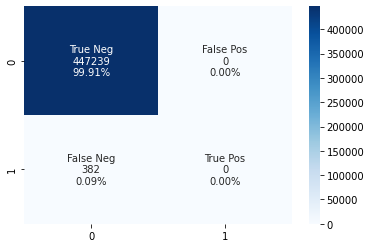

In [142]:
model_evaluation(decision_tree, Y_test, X_test)

#####Random Forest

PRECISION :  0.00%
RECALL :  0.00%


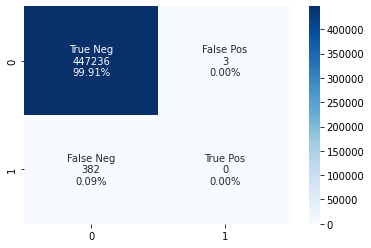

In [143]:
model_evaluation(forest, Y_test, X_test)